In [5]:
library("data.table")
library("qtl")

# inputs

In [6]:
genfile =  '../data/202'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [7]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”


 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [8]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [9]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

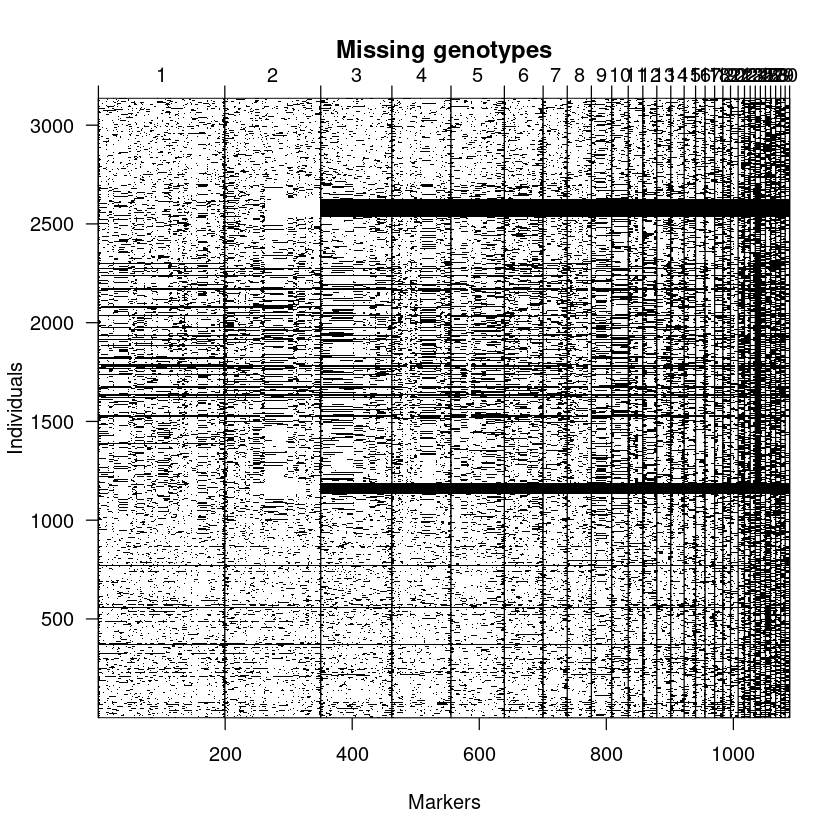

In [10]:
plotMissing(datf2)

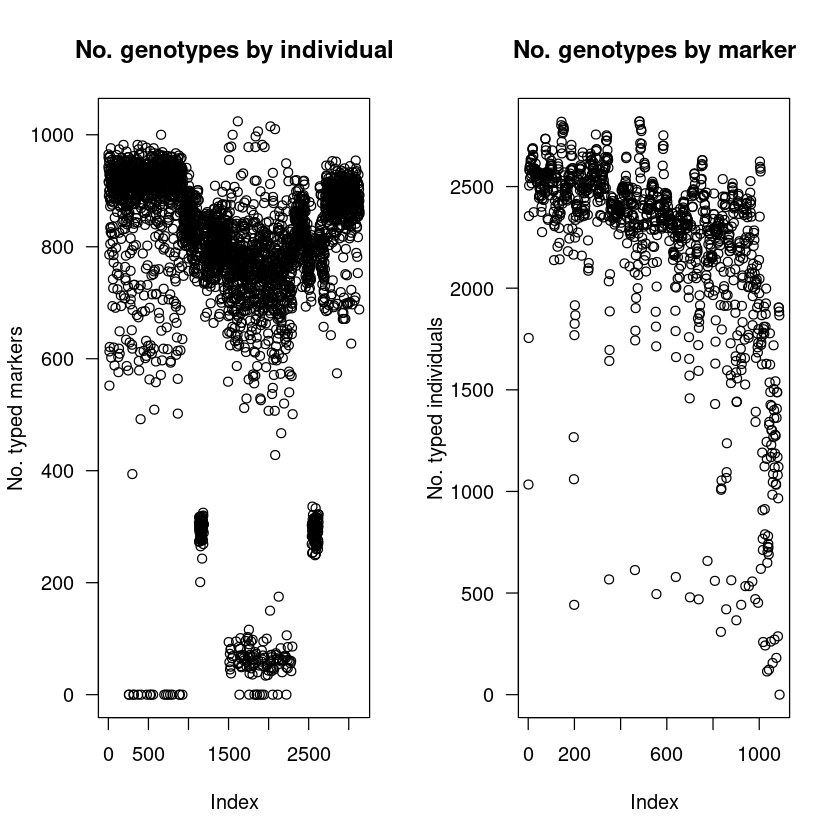

In [11]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [13]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [14]:
todrop

[1] "30-6"

In [15]:
datf2.1 <- drop.markers(datf2, todrop)

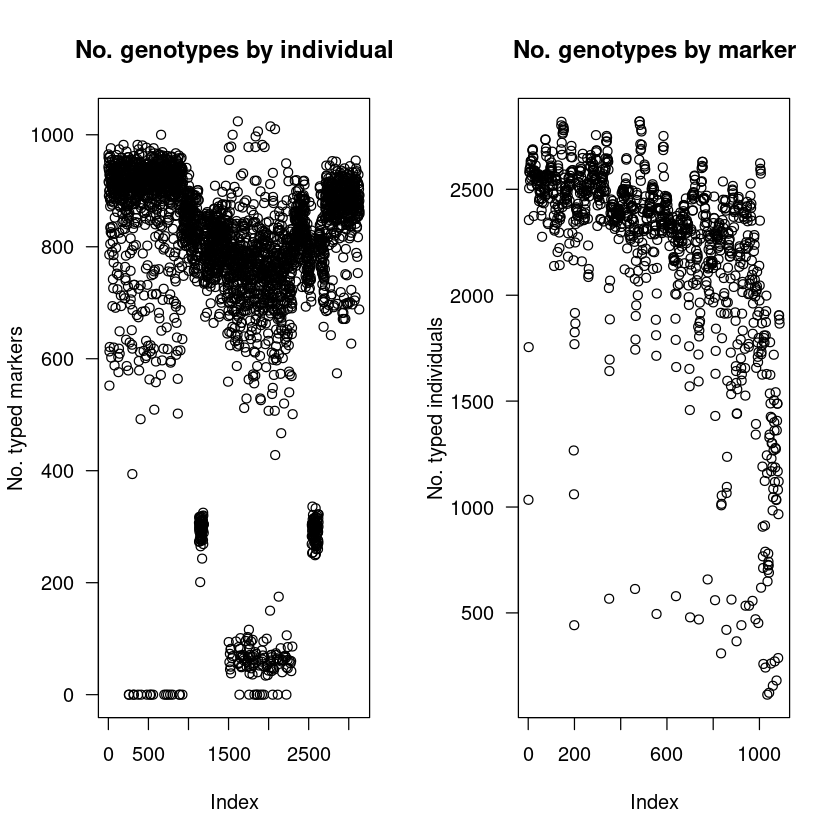

In [16]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [17]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [18]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3135

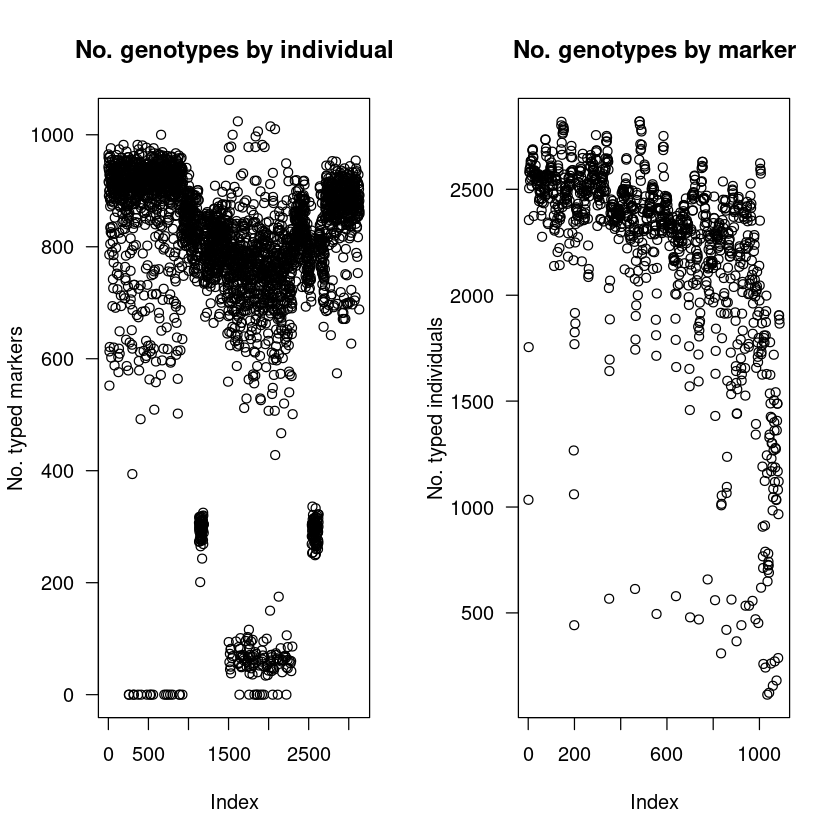

In [19]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [20]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1087 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 6 
    Percent genotyped:  70.9 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [21]:
cg <- comparegeno(datf2.2)

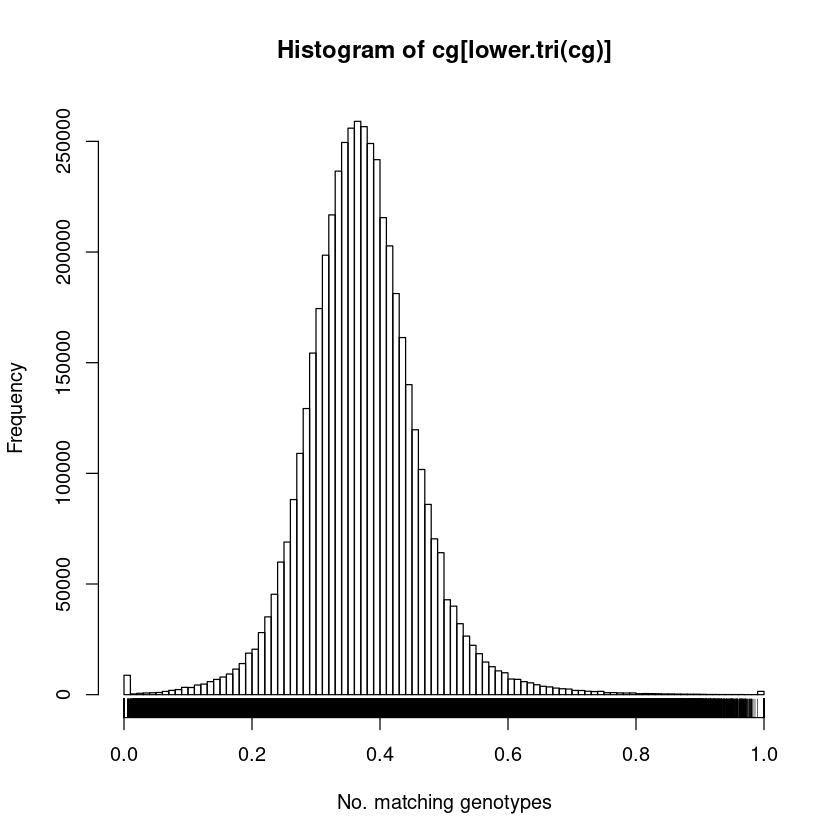

In [22]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [23]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [24]:
wh

,row,col
91202,368,538
128202,515,538
59402,7,682
128402,112,682
91202,368,682
128602,538,682
128602,538,851
95102,682,851
128902,689,851
91202,368,874


In [25]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1" "1-2"

$`1-194`
[1] "1-195" "1-196" "1-197" "1-198"

$`2-3`
[1] "2-0" "2-1" "2-2"

$`2-146`
[1] "2-147" "2-148" "2-149" "2-150"

$`3-3`
[1] "3-0" "3-1" "3-2"

$`3-107`
[1] "3-108" "3-109" "3-110" "3-111"

$`4-3`
[1] "4-0" "4-1" "4-2"

$`4-55`
[1] "4-56"

$`4-88`
[1] "4-89" "4-90" "4-91"

$`5-3`
[1] "4-92" "5-0"  "5-1"  "5-2" 

$`5-8`
[1] "5-9"

$`5-79`
[1] "5-80" "5-81" "5-82"

$`6-3`
[1] "5-83" "6-0"  "6-1"  "6-2" 

$`6-56`
[1] "6-57" "6-58" "6-59"

$`7-3`
[1] "6-60" "7-0"  "7-1"  "7-2" 

$`7-7`
[1] "7-8"

$`7-33`
[1] "7-34" "7-35" "7-36" "7-37"

$`8-3`
[1] "8-0" "8-1" "8-2"

$`8-33`
[1] "8-34" "8-35" "8-36" "8-37"

$`9-3`
[1] "9-0" "9-1" "9-2"

$`9-19`
[1] "9-18"

$`9-27`
[1] "9-28" "9-29" "9-30" "9-31"

$`10-3`
[1] "10-0" "10-1" "10-2"

$`10-21`
[1] "10-22" "10-23" "10-24" "10-25"

$`11-3`
[1] "11-0" "11-1" "11-2"

$`11-18`
[1] "11-19" "11-20" "11-21" "11-22"

$`12-3`
[1] "12-0" "12-1" "12-2"

$`12-17`
[1] "12-18" "12-19" "12-20"

$`13-3`
[1] "12-21" "13-0"  "

In [26]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [27]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-0,1,2101,136,608,290,0,0,1.209695e-17
1-1,1,1380,279,908,568,0,0,7.436830e-22
1-2,1,780,417,1155,783,0,0,1.288092e-25
1-3,1,630,453,1236,816,0,0,1.149925e-23
1-4,1,554,500,1275,806,0,0,1.456785e-16
1-5,1,539,502,1293,801,0,0,1.084951e-15
1-6,1,554,504,1281,796,0,0,4.193705e-15
1-7,1,594,501,1260,780,0,0,4.551296e-14
1-8,1,532,536,1281,786,0,0,2.704136e-11


In [28]:
length(todrop)

[1] 693

In [29]:
datf2.3 <- datf2.2

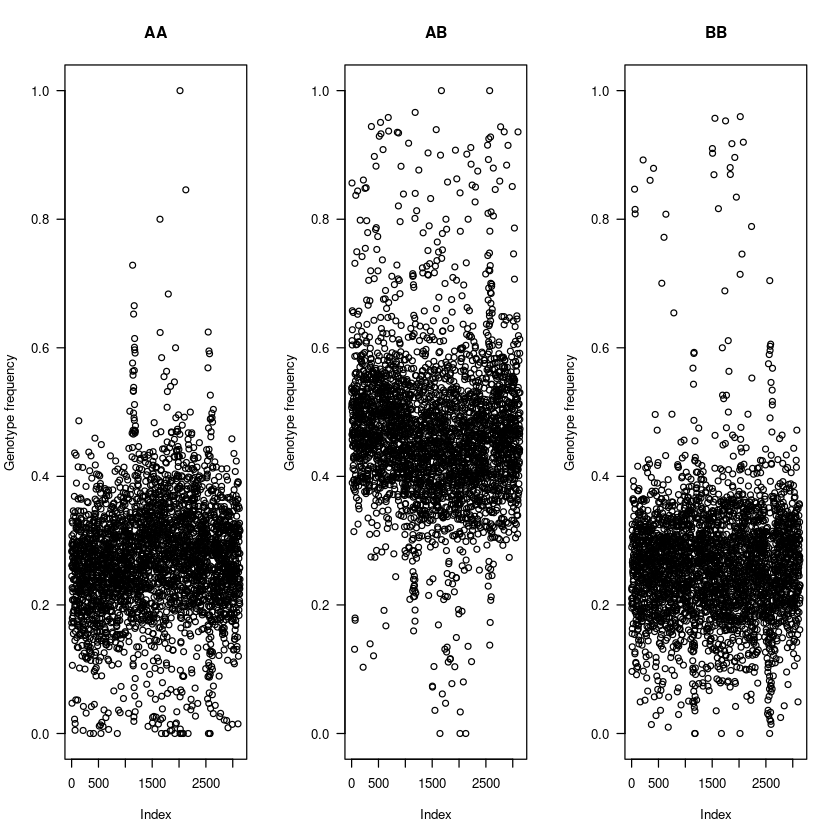

In [30]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

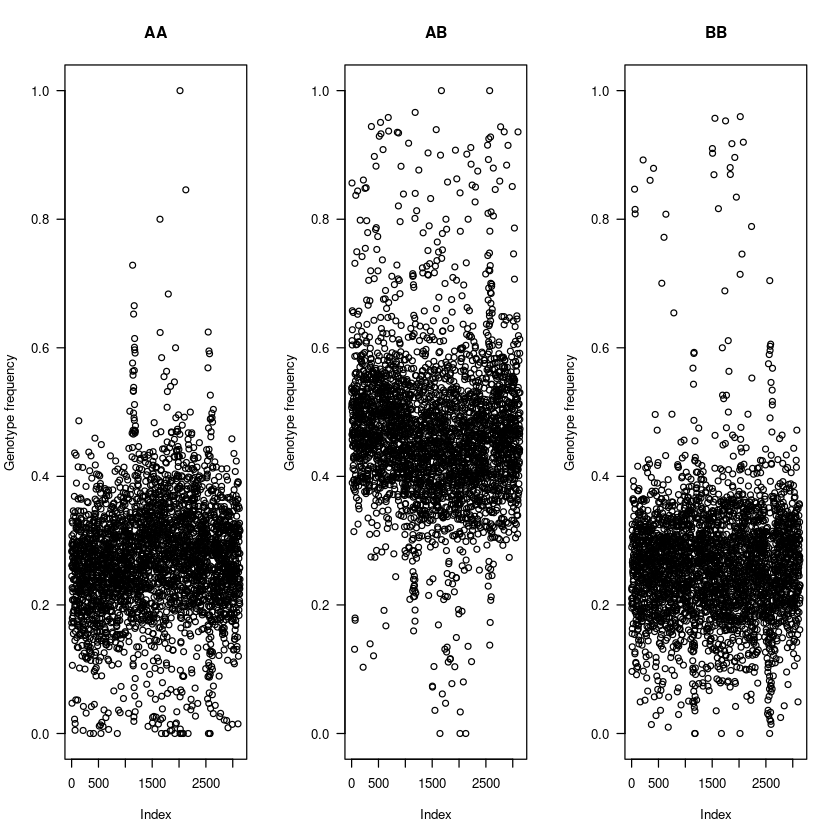

In [31]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [32]:
### do not filter for gfreq

In [33]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [34]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [35]:
datf2.4 <- datf2.3

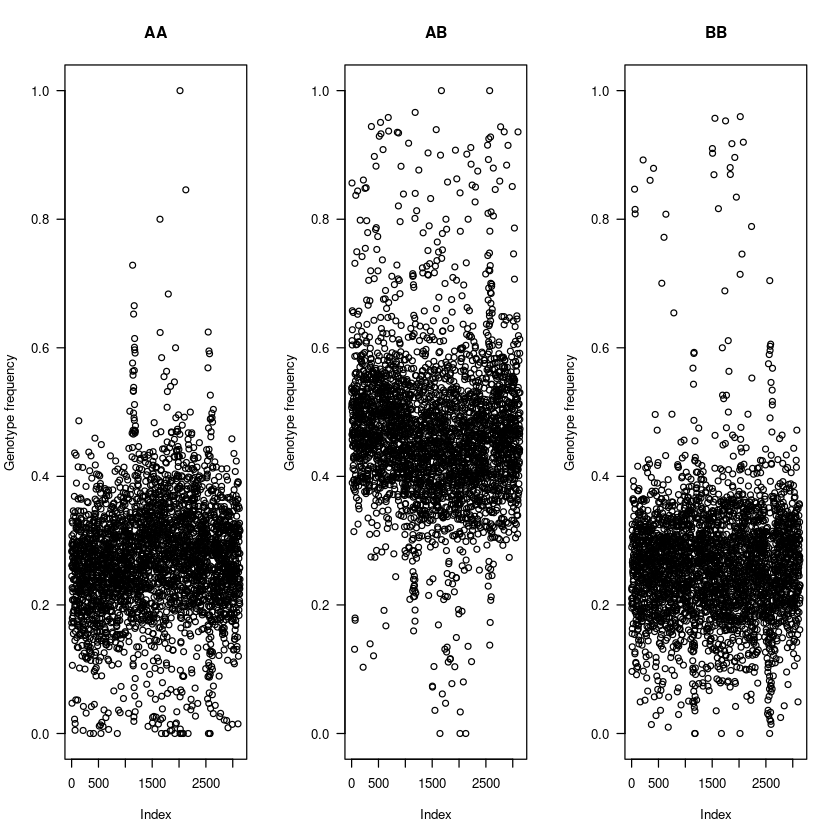

In [36]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [37]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

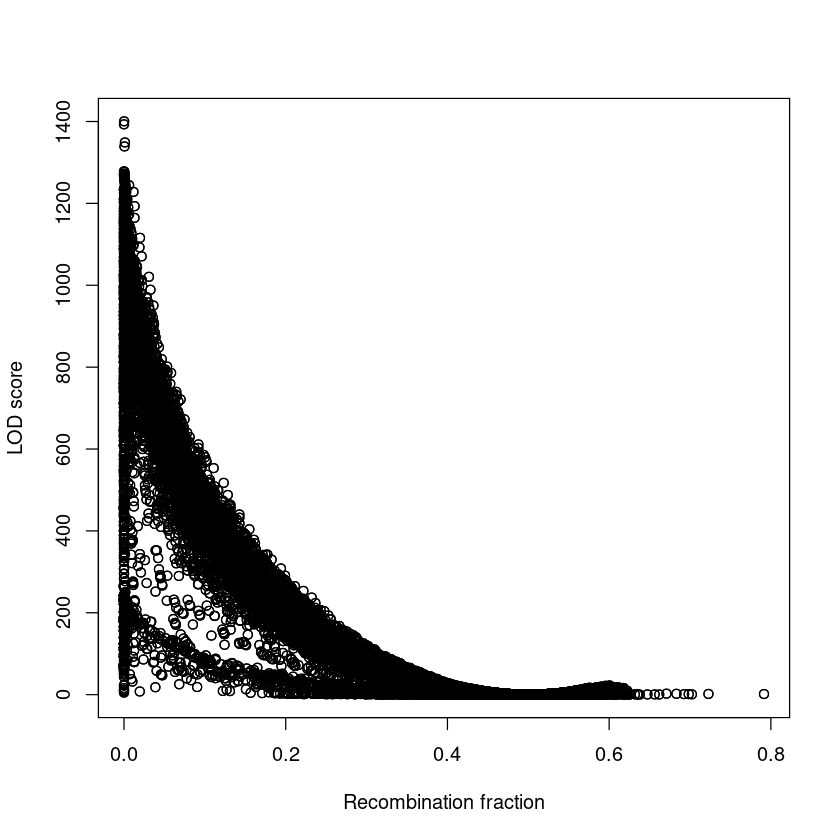

In [38]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

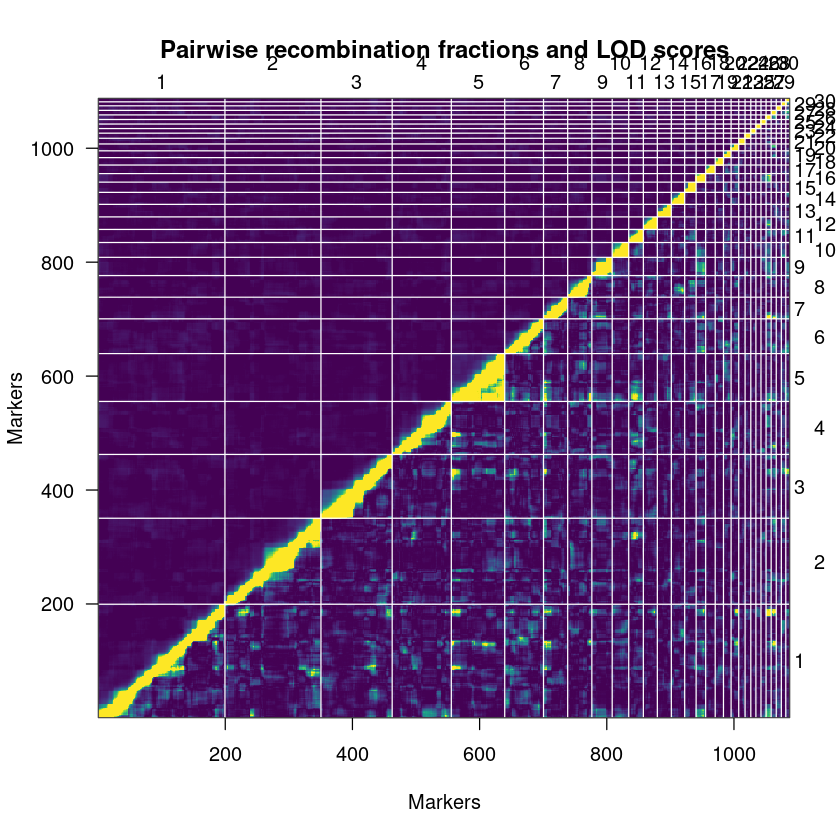

In [39]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

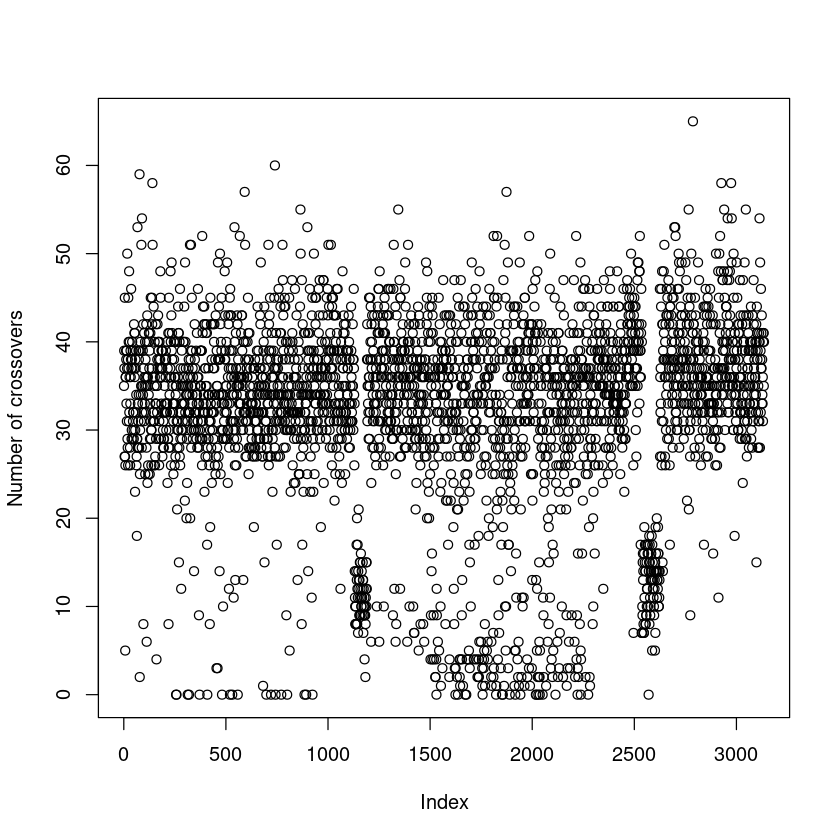

[1] 32.06316

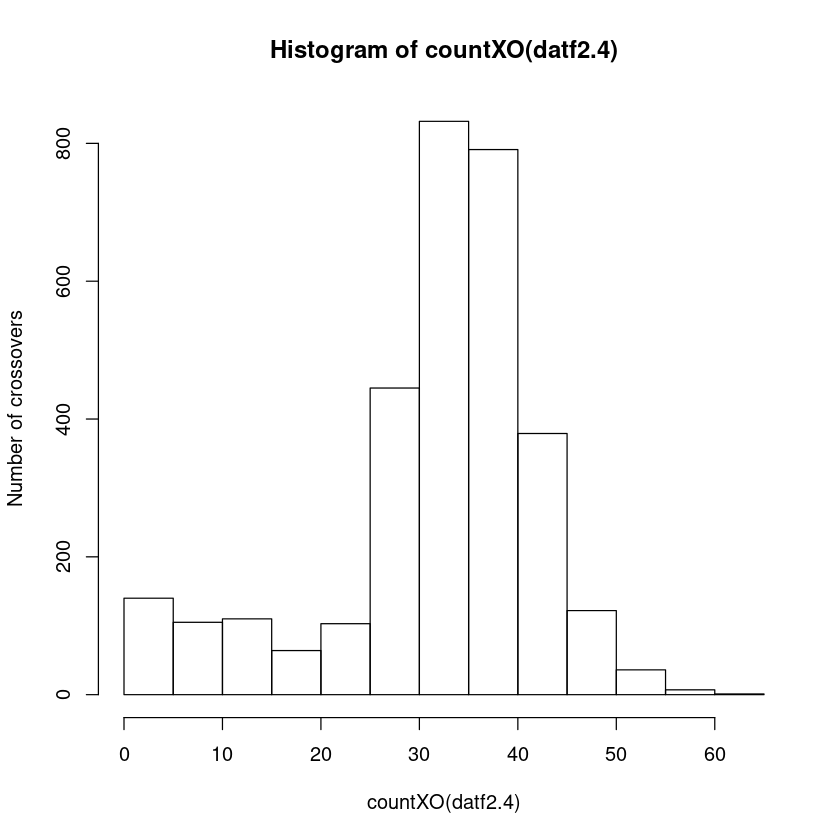

In [40]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [41]:
datf2.5 <- datf2.4

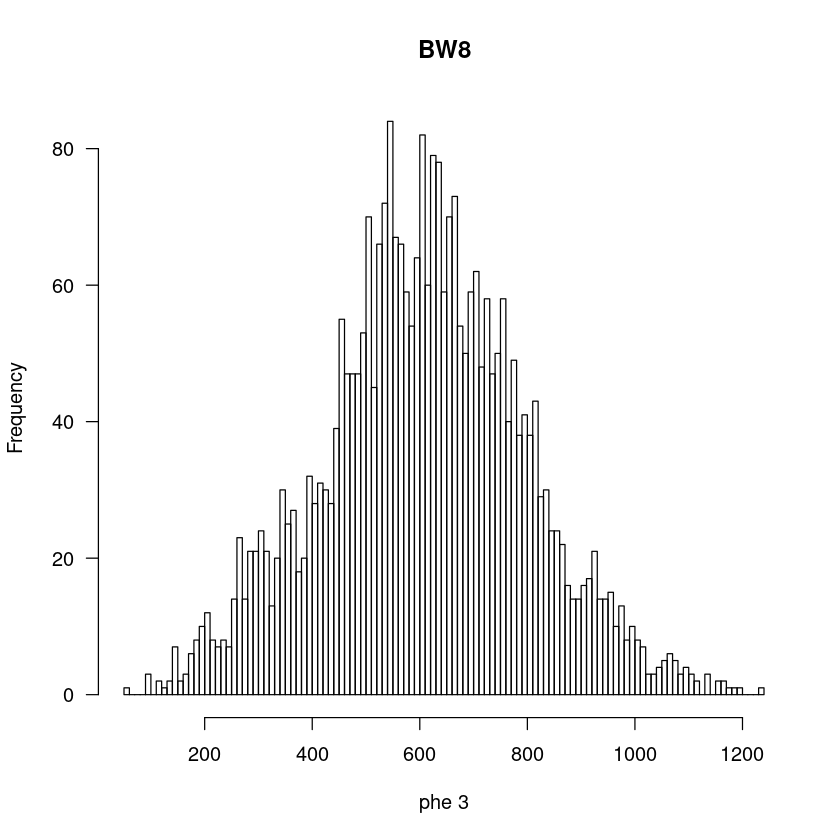

In [42]:
plotPheno(datf2.5, pheno.col=3)

# spike in precorrected phenos

In [52]:
resid = read.table('20201125_residuals_precorrected_for_sex_and_generation.csv', sep = ',', header = TRUE)

In [72]:
length(resid$sex_gen_resid)

[1] 3073

In [73]:
write.cross(datf2.5, format = 'csv', '20201125_cross')

In [74]:
test = read.cross(file='20201125_cross.csv',
                  format='csv',
                  crosstype =  'f2',
                 genotypes = c('AA','AB','BB',"C","D"))

 --Read the following data:
	 3135  individuals
	 1087  markers
	 7  phenotypes
 --Cross type: f2 


In [76]:
test$pheno['BW8']!='NA'

BW8
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


In [77]:
test2 <- subset(test, ind=test$pheno['BW8']!='NA')

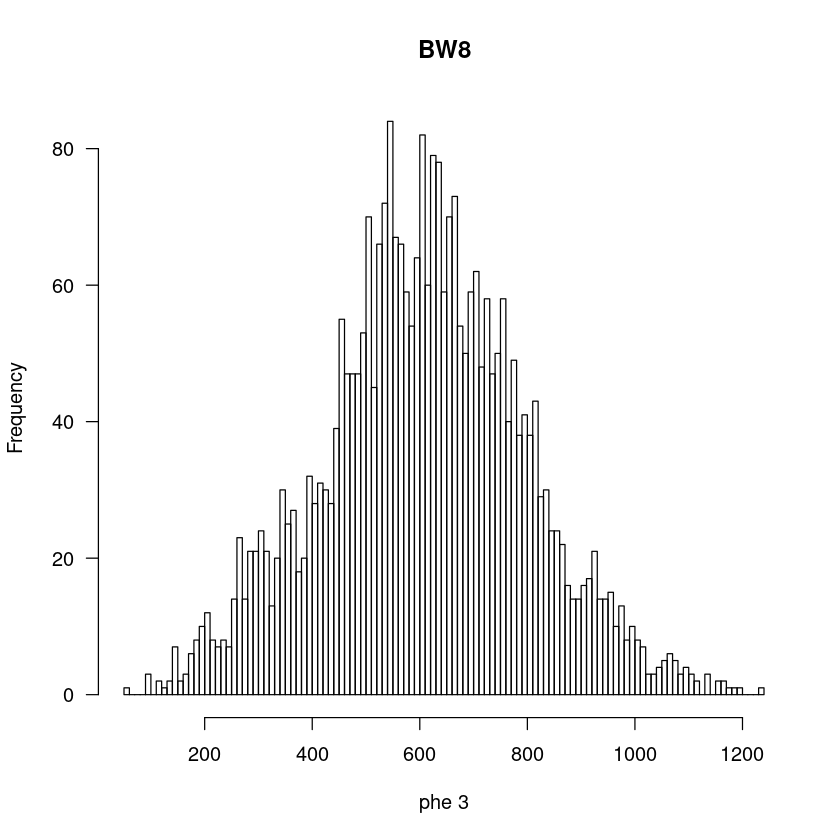

In [86]:
plotPheno(test2, pheno.col = 3)

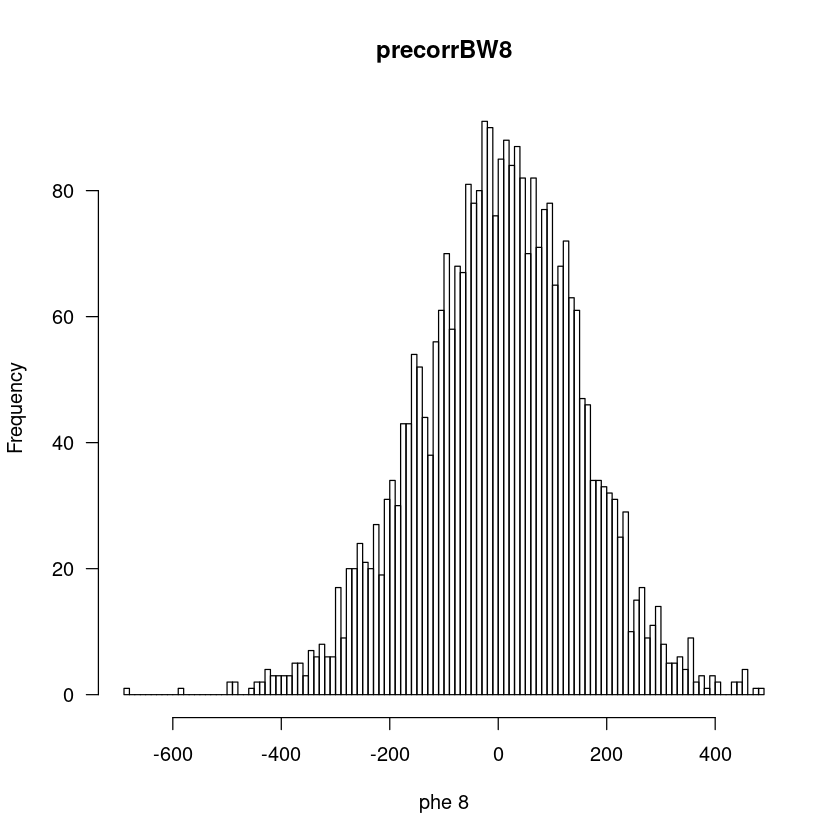

In [87]:
plotPheno(test2, pheno.col = 8)

In [79]:
test2$pheno['precorrBW8'] <- resid$sex_gen_resid

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [80]:
test2 <- calc.genoprob(test2, step=1)

In [81]:
test2 <- calc.genoprob(test2, step=0, off.end = 0)


In [100]:
ac <- pull.pheno(test2, c("SEX", 'GENERATION')) # only need sex since these are all f2s

In [103]:
out.hk.AC <- scanone(test2, pheno.col =3, addcovar=ac,  method='hk') 

In [89]:
out.hk.precor <- scanone(test2, pheno.col = 8,  method='hk') 

# get significance thresholds

In [92]:
out.hk.precor.perm <- scanone(test2, pheno.col = 8,  method='hk', n.perm = 10000) 

Doing permutation in batch mode ...


In [116]:
test2chr4 = subset(test2, chr=4)

In [117]:
out.hk.precor.chr4.perm <- scanone(test2chr4, pheno.col = 8,  method='hk', n.perm = 10000) 

Doing permutation in batch mode ...


In [94]:
summary(out.hk.precor.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.80
10% 3.48

In [118]:
summary(out.hk.precor.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.70
10% 2.36

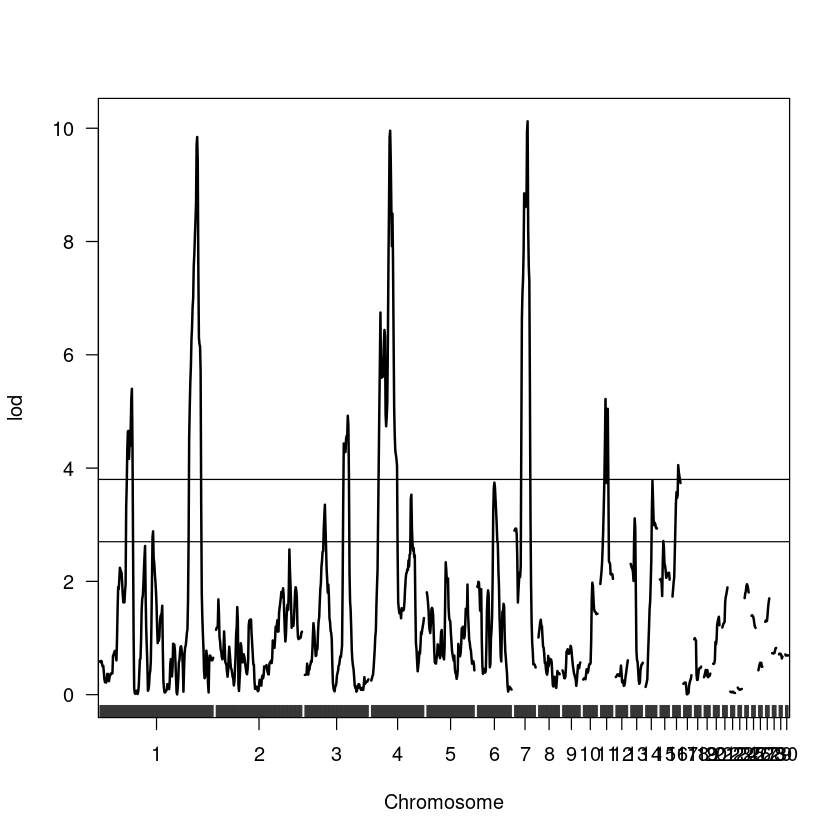

In [119]:
plot(out.hk.precor)
abline(h=3.8)
abline(h=2.7)

In [151]:
save.image(file = "20201125_rqtl_all_precorr_perm.Rdata")

# extract positions

In [146]:
chrom <- summary(out.hk.precor, threshold = 3.8)$chr
pos <- summary(out.hk.precor, threshold = 3.8)$pos

In [152]:
chrom_sugg <- summary(out.hk.precor, threshold = 2.7)$chr
pos_sugg <- summary(out.hk.precor, threshold = 2.7)$pos

In [153]:
#summary(out.hk.precor, threshold = 2.7, format = 'allpeaks')

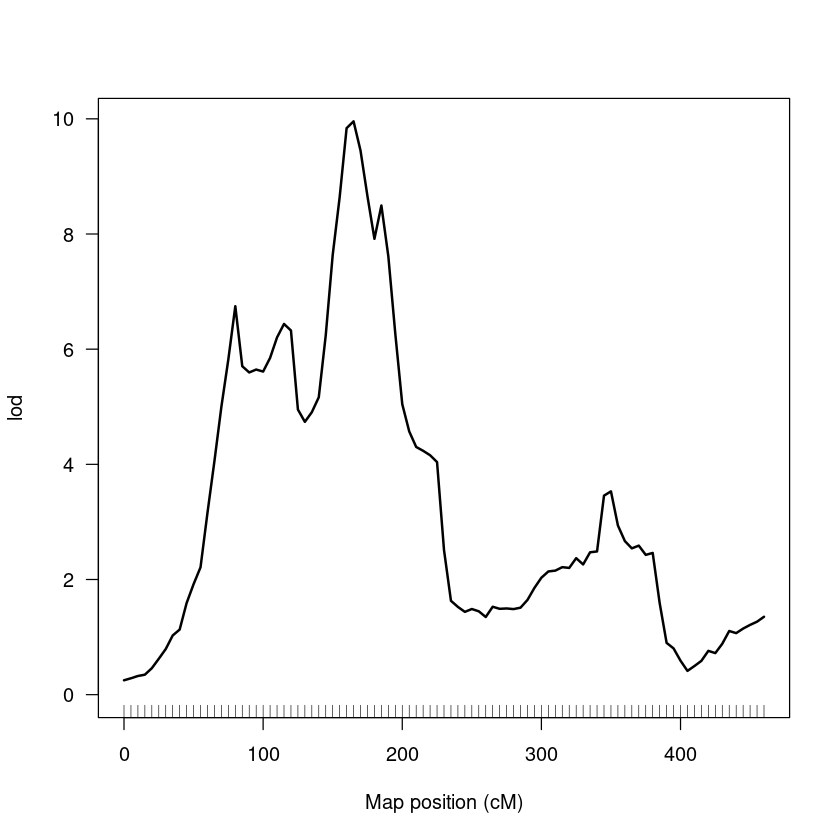

In [144]:
plot(out.hk.precor, chr=4)

In [154]:
qtls <- makeqtl(test2, chr = chrom_sugg, pos = pos_sugg, what = 'prob')

In [155]:
fit_sugg <- fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests=TRUE)

Warning message in fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”


In [156]:
length(chrom_sugg)

[1] 10

In [158]:
chrom <- chrom_sugg
pos <- pos_sugg
for (qtl in seq(1,10)){
    curr_chrom <- chrom[qtl]
    curr_pos <- pos[qtl]
    qtls <- makeqtl(test2, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(test2, pheno.col = 3, qtl = qtls, get.ests=TRUE, method = 'hk')
    print(summary(fit_sugg))
}


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 

        df        SS        MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model    2   1128025 564012.42 7.008653 1.044814 9.802733e-08 9.958395e-08
Error 3070 106836162  34800.05                                            
Total 3072 107964187                                                      


Estimated effects:
-----------------
              est      SE       t
Intercept 608.313   3.376 180.192
1@850.0a   28.651   5.054   5.669
1@850.0d    7.037   7.372   0.955


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 

        df          SS        MS      LOD      %var Pvalue(Chi2)    Pvalue(F)
Model    2    505397.7 252698.87 3.131042 0.4681161 0.0007395332 0.00074

In [150]:
#summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 

        df       SS       MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   12  4182726 348560.5 42.32499 6.145817            0         0
Error 3060 63875371  20874.3                                         
Total 3072 68058097                                                  


Drop one QTL at a time ANOVA table: 
----------------------------------  
        df Type III SS    LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@850.0  2      878426  9.114 1.2907  21.041        0.000  8.40e-10 ***
3@375.0  2      344492  3.589 0.5062   8.252        0.000  0.000267 ***
4@165.0  2      944253  9.792 1.3874  22.618        0.000  1.78e-10 ***
7@115.0  2      995710 10.322 1.4630  23.850        0.000  5.27e-11 ***
11@45.0  2      296868  3.094 0.4362   7.111        0.001  0.000830 ***


In [138]:
summary(out.hk.AC, threshold = 3.77, format = 'allpeaks')

Warning message in summary.scanone(out.hk.AC, threshold = 3.77, format = "allpeaks"):
“With just one LOD column, format="onepheno" used.”


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-50,1,250,8.985269
4-15,4,75,7.974310
6-29,6,145,4.791382
7-23,7,115,14.349239
9-0,9,0,4.705511
10-16,10,80,3.884970
13-8,13,40,5.454748
27-7,27,35,4.132707


In [145]:
summary(out.hk.AC, threshold = 2.69, format = 'allpeaks')

Warning message in summary.scanone(out.hk.AC, threshold = 2.69, format = "allpeaks"):
“With just one LOD column, format="onepheno" used.”


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-50,1,250,8.985269
2-139,2,695,3.087303
4-15,4,75,7.974310
6-29,6,145,4.791382
7-23,7,115,14.349239
8-36,8,180,3.444280
9-0,9,0,4.705511
10-16,10,80,3.884970
12-9,12,45,3.175481


In [133]:
library('qtl')

find_peaks {qtl2},R Documentation
scan1_output,"An object of class ""scan1"" as returned by scan1()."
map,"A list of vectors of marker positions, as produced by insert_pseudomarkers(). Can also be an indexed SNP info table, as from index_snps() or scan1snps()."
threshold,Minimum LOD score for a peak (can be a vector with separate thresholds for each lod score column in scan1_output)
peakdrop,"Amount that the LOD score must drop between peaks, if multiple peaks are to be defined on a chromosome. (Can be a vector with separate values for each lod score column in scan1_output.)"
drop,"If provided, LOD support intervals are included in the results, and this indicates the amount to drop in the support interval. (Can be a vector with separate values for each lod score column in scan1_output.) Must be ≤ peakdrop"
prob,"If provided, Bayes credible intervals are included in the results, and this indicates the nominal coverage. (Can be a vector with separate values for each lod score column in scan1_output.) Provide just one of drop and prob."
thresholdX,"Separate threshold for the X chromosome; if unspecified, the same threshold is used for both autosomes and the X chromosome. (Like threshold, this can be a vector with separate thresholds for each lod score column.)"
peakdropX,"Like peakdrop, but for the X chromosome; if unspecified, the same value is used for both autosomes and the X chromosome. (Can be a vector with separate values for each lod score column in scan1_output.)"
dropX,Amount to drop for LOD support intervals on the X chromosome. Ignored if drop is not provided. (Can be a vector with separate values for each lod score column in scan1_output.)
probX,Nominal coverage for Bayes intervals on the X chromosome. Ignored if prob is not provided. (Can be a vector with separate values for each lod score column in scan1_output.)


# Cell Graveyard

# subset the data to only include Wahlberg F2s

In [ ]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [ ]:
idvec <- IDs[, 'V1']

In [ ]:
idvec <- as.double(idvec)

In [ ]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [ ]:
#subset
datf2= subset(datf2, ind = all_individs)

In [ ]:
summary(datf2)

# subset data to only include Wahlberg Markers

In [ ]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

In [ ]:
datf2 <- pull.markers(datf2, Wahlberg_bins$V2 )